# TL;DR

- matplotlibで、複数のサイズの異なるプロットを一つの画像にするのがしんどい。
- そういった時にはmatplotlibのGridSpecを使うと分かりやすく、書きやすく感じました。おすすめ。

# subplotしんどい。

- 私だけの可能性も多分にありますが、MATLABを触ったことがなく馴染みがないせいか、どうにもmatplotlibで複雑なことをしようとすると、手が止まってしまうことがよくあります。
- 特に、複数のプロットを使ってレイアウントを組んだりするのに苦手意識がありました。（同じサイズでのレイアウトはまだしも、サイズが異なる場合など特に）
- 面倒になって、フォトショやPILで画像のレイアウトをしたくなる衝動に駆られる時があります。「複数のプロットをしたいだけなんや！matplotlibの調整で消耗したくないんや！」と心の奥底で叫びたくなります。
- そんな中、matplotlibの本を読んでいて、GridSpecなるものを知り、これなら私でもストレス少なく使えそう・・というように感じたため、記事にしてみます。

# 使い方と手順

## まずはどんなレイアウトにするのかを決める。

- 複雑なレイアウトの場合には、最初からmatplotlibのコードを書き始めるのではなく、紙や記号でどんなレイアウトにしたいのか、事前に書き出してみるのが本でおすすめされていました。
- 今回もそれにならって、まずは記号で表現してみます。

<img width="195" alt="20180623_1.png" src="https://qiita-image-store.s3.amazonaws.com/0/228778/9ae2047c-614b-a994-676c-7f128495631f.png">

こんな感じのレイアウトにすると決めたとします。

## レイアウトだけのコードを書く。

- GridSpecを使ってコードを書いていきます。最初からレイアウトとプロット用のデータ設定、細かい調整などを同時にやると頭が混乱するため、まずはデータは指定せずにレイアウトだけで組みます。
- 番号などは、前述のレイアウト案のものに合わせて、1～4で変数名に指定していきます。実際に使う際にプロット内容に合わせた変数名に調整してください。

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('ggplot')
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


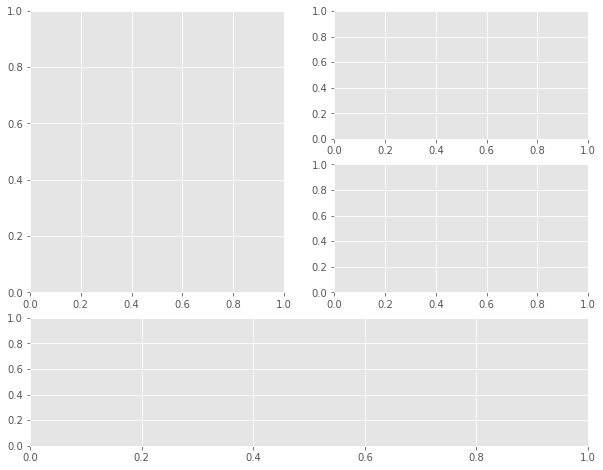

In [2]:
# 画像全体のサイズを指定（縦, 横）。
figure = plt.figure(figsize=(10, 8))

# 全体のGridSpec。必要なプロットの行数と列数、各行のサイズの比率を指定します。
# 今回はプロットの行の数が3、列の数が2で、各行の比率は同じ（[1, 1, 1]）とします。
# もし最後のプロット4だけ縦に大きくしたいといった場合には、[1, 1, 2]などと指定すると
# プロット4が2倍の高さになります。
gs_master = GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 1])

# プロット1部分。個別のプロットはGridSpecFromSubplotSpecクラスを使用します。
# このプロットで占有する行数と列数、GridSpec内でどこに該当するプロットなのか
# を指定します。縦2つ分、横1つ分となるので、nrows=2、ncols=2と指定しています。
# また、プロット内の0と1のインデックスの行領域と0のインデックスの列（左側）の
# 領域を指定するため、subplot_specにGridSpecの[0:2, 0]の位置を指定しています。
gs_1 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0:2, 0])
# GridSpecFromSubplotSpecの中で、さらにどの領域を使用してプロットをするかを
# add_subplot関数の引数に指定してプロットを追加します。今回は、プロット1の領域
# には1つのプロットしか配置しないので、すべての領域を指定するため行と列の
# インデックスにコロンを指定しています。
axes_1 = figure.add_subplot(gs_1[:, :])

# プロット2とプロット3部分。プロット1の領域と比べて、2分割して配置するので一緒の
# GridSpecFromSubplotSpecを参照します。必要な行数（nrows）と列数（ncols）はプロット1
# と変わりありません。インデックス0と1の行領域と右側の列（インデックス1）を指定
# するため、subplot_specに[0:2, 1]と指定しています。
gs_2_and_3 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0:2, 1])
# プロット2を追加します。GridSpecFromSubplotSpec内の最初の行（インデックス0）、
# 列は領域を全て使うのでコロンを指定しています。
axes_2 = figure.add_subplot(gs_2_and_3[0, :])
# 同様にプロット3。プロット2の次のインデックスの行を指定するため、[1, :]と指定
# しています。
axes_3 = figure.add_subplot(gs_2_and_3[1, :])

# プロット4部分。必要な行数が1（nrows=1）、列は左側と右側両方占めるため列数2
# （ncols=2）、subplot_specには3番目の行（インデックス2）とすべての列を指定
# するため[2, :]と指定しています。
gs_4 = GridSpecFromSubplotSpec(nrows=1, ncols=2, subplot_spec=gs_master[2, :])
# プロット1同様、この領域にはプロットが一つだけなので、GridSpecFromSubplotSpec
# のすべてのインデックスをコロンで指定しています。
axes_4 = figure.add_subplot(gs_4[:, :])

文字が被ってしまっているところなど、微調整が必要な個所はありますが、とりあえず想定したレイアウトが作れました。

内容を理解しやすいようにコメントを長々と書きましたが、実際に扱う際には、コードは以下の分だけになります。シンプル！

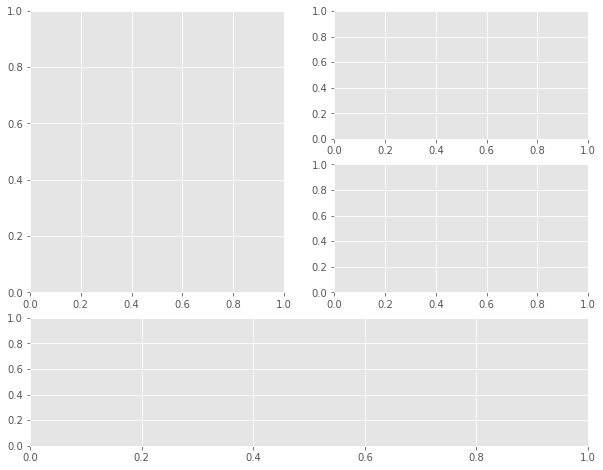

In [3]:
figure = plt.figure(figsize=(10, 8))
gs_master = GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 1])

gs_1 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0:2, 0])
axes_1 = figure.add_subplot(gs_1[:, :])

gs_2_and_3 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0:2, 1])
axes_2 = figure.add_subplot(gs_2_and_3[0, :])
axes_3 = figure.add_subplot(gs_2_and_3[1, :])

gs_4 = GridSpecFromSubplotSpec(nrows=1, ncols=2, subplot_spec=gs_master[2, :])
axes_4 = figure.add_subplot(gs_4[:, :])

- 画像の大きさと縦の比率を決めて、各プロットで占有する領域を行と列のインデックスで指定するだけです。
- 普段NumPyやPandasなどでインデックスを扱っているのと同じなので分かりやすい:D

## データを用意して、個別のプロットを確認してみる。

- 今回はサンプルなので乱数などで適当な値を指定してしまいます。（実際には各所からデータを引っ張ってきたりなど）

In [4]:
import numpy as np

In [5]:
x_1 = np.arange(1000, 2000, 10)

In [6]:
y_1 = np.random.randint(low=5000, high=10000, size=x_1.shape)

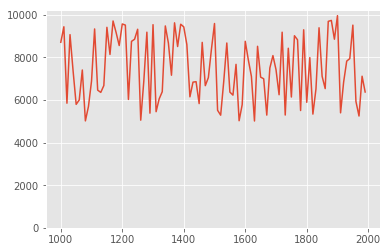

In [7]:
plt.plot(x_1, y_1, '-')
_ = plt.ylim(ymin=0)

In [8]:
x_2 = np.arange(0, 10)

In [9]:
y_2 = np.random.randint(low=2, high=10, size=x_2.shape)

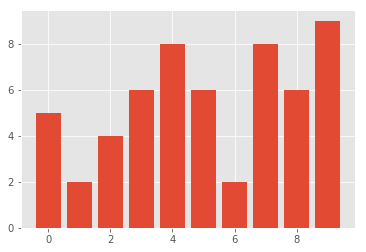

In [10]:
_ = plt.bar(x_2, y_2)

In [11]:
x_3 = np.arange(0, 10)

In [12]:
y_3 = np.random.randint(low=2, high=10, size=x_2.shape)

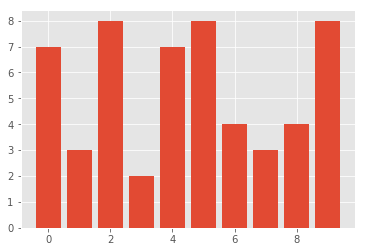

In [13]:
_ = plt.bar(x_3, y_3)

In [14]:
x_4 = np.arange(-6, 6, 0.1)

In [15]:
y_4 = np.sin(x_4)

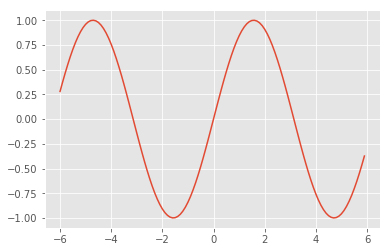

In [16]:
_ = plt.plot(x_4, y_4)

## データを指定する。

- レイアウトが組めて、個別のプロットのデータも用意できたので、配列を指定してデータを設定します。
- すでに各axesの変数がレイアウトの際に生成されているので、それに対してplot関数で配列や必要な種別などオプションを指定するだけです。
- 事前にレイアウトを組むことで、変数へのアクセスができるようになり、各axesオブジェクトを触る際に[hinterland](https://qiita.com/simonritchie/items/d7dccb798f0b9c8b1ec5#%E5%85%A5%E5%8A%9B%E8%A3%9C%E5%AE%8C)が有効になっていれば入力補完が効きます。必要な引数名などを調べながら実行できます。

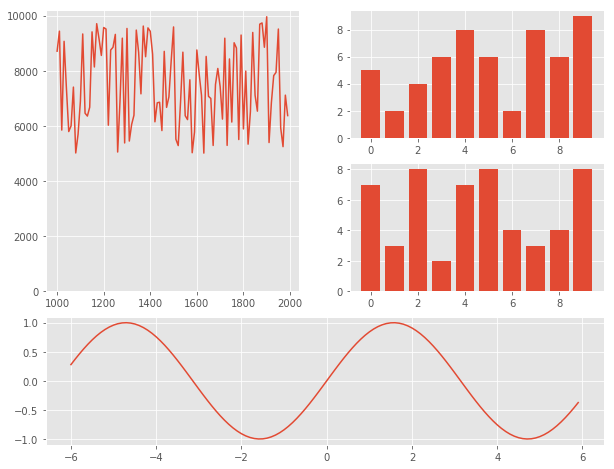

In [17]:
figure = plt.figure(figsize=(10, 8))
gs_master = GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 1])

gs_1 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0:2, 0])
axes_1 = figure.add_subplot(gs_1[:, :])
axes_1.plot(x_1, y_1, '-')
axes_1.set_ylim(bottom=0)

gs_2_and_3 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0:2, 1])
axes_2 = figure.add_subplot(gs_2_and_3[0, :])
axes_2.bar(x_2, y_2)
axes_3 = figure.add_subplot(gs_2_and_3[1, :])
axes_3.bar(x_3, y_3)

gs_4 = GridSpecFromSubplotSpec(nrows=1, ncols=2, subplot_spec=gs_master[2, :])
axes_4 = figure.add_subplot(gs_4[:, :])
_ = axes_4.plot(x_4, y_4)

## プロットの余白を設定する。

- 今回はmatplotlibのデフォルト設定でx軸のラベルなどがうまく被らないようになりました。しかし実際の業務では文字が被ってしまって調整が必要になったりすることがあります。
- そういった場合でも、GridSpecの余白設定を追加することで、決められた領域内で、プロットを小さくしたりして文字などが被らないように調整ができます。
- まずは、そういった要素が被ってしまうようなケースをわざと作ってみます。プロット1のＸ軸の文字を回転させて、下のプロットと被らせます。setp関数部分など、処理を2行加えてあります。

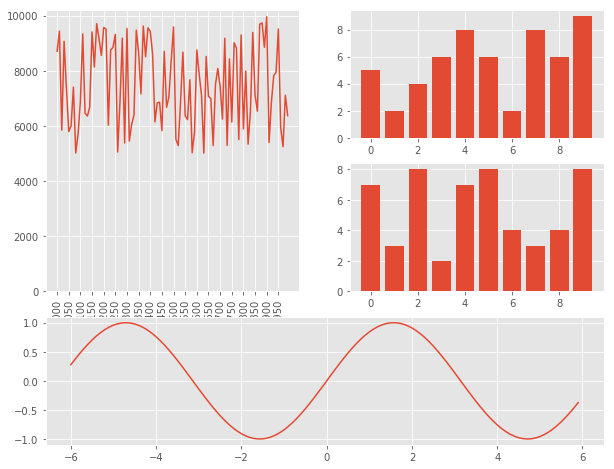

In [19]:
figure = plt.figure(figsize=(10, 8))
gs_master = GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 1])

gs_1 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0:2, 0])
axes_1 = figure.add_subplot(gs_1[:, :])
axes_1.plot(x_1, y_1, '-')
axes_1.set_ylim(bottom=0)

# 以下の2行でＸ軸ラベルの回転などを調整し、わざと表示を被らせます。
axes_1.set_xticks(np.arange(1000, 2000, 50))
plt.setp(axes_1.get_xticklabels(), rotation=90)

gs_2_and_3 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0:2, 1])
axes_2 = figure.add_subplot(gs_2_and_3[0, :])
axes_2.bar(x_2, y_2)
axes_3 = figure.add_subplot(gs_2_and_3[1, :])
axes_3.bar(x_3, y_3)

gs_4 = GridSpecFromSubplotSpec(nrows=1, ncols=2, subplot_spec=gs_master[2, :])
axes_4 = figure.add_subplot(gs_4[:, :])
_ = axes_4.plot(x_4, y_4)

- GridSpec及びGridSpecFromSubplotSpecにはwspaceやhspaceという引数名で横軸方向や縦軸方向に対する余白を設定することができるのでこれを使います。CSSのpaddingなどに近い感覚です。
- 今回は縦軸方向だけ余白を加えたいので、GridSpecの引数に対してhspaceの値を設定してみます。各プロットで縦軸方向に余白が多く取られ、文字が被ったりが直っていることが分かります。
- 1行変えるだけで各プロットのレイアウトを良い感じに調整してくれていい感じです。

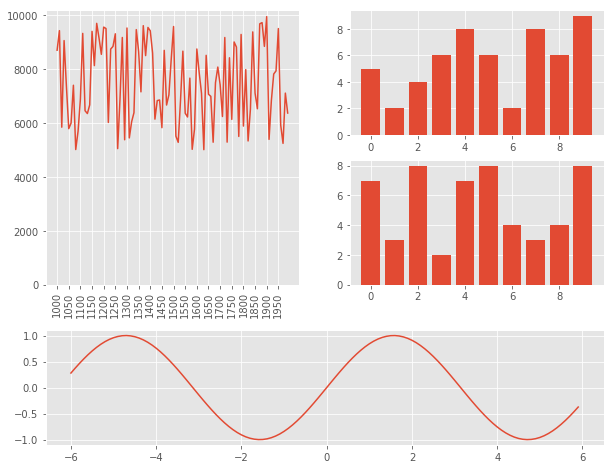

In [25]:
figure = plt.figure(figsize=(10, 8))
# 以下の行で、hspaceの引数だけ追加して縦軸の余白を増やしています。
gs_master = GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 1], hspace=0.4)

gs_1 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0:2, 0])
axes_1 = figure.add_subplot(gs_1[:, :])
axes_1.plot(x_1, y_1, '-')
axes_1.set_ylim(bottom=0)
axes_1.set_xticks(np.arange(1000, 2000, 50))
plt.setp(axes_1.get_xticklabels(), rotation=90)

gs_2_and_3 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0:2, 1])
axes_2 = figure.add_subplot(gs_2_and_3[0, :])
axes_2.bar(x_2, y_2)
axes_3 = figure.add_subplot(gs_2_and_3[1, :])
axes_3.bar(x_3, y_3)

gs_4 = GridSpecFromSubplotSpec(nrows=1, ncols=2, subplot_spec=gs_master[2, :])
axes_4 = figure.add_subplot(gs_4[:, :])
_ = axes_4.plot(x_4, y_4)

# まとめ

- 複数のプロットで込み入ったレイアウトのmatplotlibのプロットを組む際には、GridSpecを使うとシンプルで、全体の調整なども少ない記述でいけます。
- 今回の例はまだしも、10～20といった大量のプロットでレイアウトを組む際などに結構力を発揮しそうです。（書籍の例題は同時に17プロットのレイアウト）
- GridSpecさんイケメン。

# 参考書籍

- [Mastering matplotlib](https://www.amazon.com/Mastering-matplotlib-Duncan-M-McGreggor/dp/1783987545/ref=sr_1_1/132-4868789-6145214?ie=UTF8&qid=1529818904&sr=8-1&keywords=mastering+matplotlib)
    - ※GridSpecは確かChapter6辺りで触れられています。